In [1]:
from pylab import *
import copy

In [11]:
def fun(x,y,a,b,c,s,r,t):
    return a*(y-b*x**2+c*x-r)**2+s*(1-t)*np.cos(x)+s+5*x

def grad(x,y,a,b,c,s,r,t):
    componente1=2*a*(y-b*x**2+c*x-r)*(-2*b*x+c)-s*(1-t)*np.sin(x)+5
    componente2=2*a*(y-b*x**2+c*x-r)

    return [componente1,componente2]


#Definimios los parametros
a=1
b=5.1/(4*np.pi**2)
c=5/np.pi
r=6
s=10
t=1/(8*np.pi)

x_0=6
y_0=12
alpha=0.01

Nsteps=400

In [46]:
def algoritmo_2(beta):
    

    xk_algo2 = np.zeros(Nsteps+1)
    yk_algo2 = np.zeros(Nsteps+1)
    vk_x_algo2=np.zeros(Nsteps+1)
    vk_y_algo2=np.zeros(Nsteps+1)

    fK_algo2=np.zeros(Nsteps+1)
    norma_grad_algo2=np.zeros(Nsteps+1)

    xk_algo2[0] = x_0    
    yk_algo2[0] = y_0 
    vk_x_algo2[0]=0
    vk_y_algo2[0]=0

    fK_algo2[0]= fun(x_0,y_0,a,b,c,s,r,t)

    for ii in range(Nsteps):
        calculo_gradiente=grad(xk_algo2[ii], yk_algo2[ii], a,b,c,s,r,t)
        vk_x_algo2[ii+1]=beta*vk_x_algo2[ii]+alpha*calculo_gradiente[0]
        vk_y_algo2[ii+1]=beta*vk_y_algo2[ii]+alpha*calculo_gradiente[1]
        xk_algo2[ii+1] = xk_algo2[ii] - vk_x_algo2[ii+1]
        yk_algo2[ii+1] = yk_algo2[ii] - vk_x_algo2[ii+1]

        ## calculamos la evolucion ee f y norma grad
        fK_algo2[ii+1]=fun(xk_algo2[ii],yk_algo2[ii],a,b,c,s,r,t)
        norma_grad_algo2[ii]= np.transpose(calculo_gradiente) @ calculo_gradiente

    return [xk_algo2,yk_algo2,fK_algo2,norma_grad_algo2]



In [98]:
def algoritmo_3(beta):
    # cambia el punto donde se evalua el granditne

    xk_algo2 = np.zeros(Nsteps+1)
    yk_algo2 = np.zeros(Nsteps+1)
    vk_x_algo2=np.zeros(Nsteps+1)
    vk_y_algo2=np.zeros(Nsteps+1)

    fK_algo2=np.zeros(Nsteps+1)
    norma_grad_algo2=np.zeros(Nsteps+1)

    xk_algo2[0] = x_0    
    yk_algo2[0] = y_0 
    vk_x_algo2[0]=0
    vk_y_algo2[0]=0

    fK_algo2[0]= fun(x_0,y_0,a,b,c,s,r,t)

    for ii in range(Nsteps):
        calculo_gradiente=grad(xk_algo2[ii]-beta*vk_x_algo2[ii], yk_algo2[ii]-beta*vk_y_algo2[ii], a,b,c,s,r,t)
        vk_x_algo2[ii+1]=beta*vk_x_algo2[ii]+alpha*calculo_gradiente[0]
        vk_y_algo2[ii+1]=beta*vk_y_algo2[ii]+alpha*calculo_gradiente[1]
        xk_algo2[ii+1] = xk_algo2[ii] - vk_x_algo2[ii+1]
        yk_algo2[ii+1] = yk_algo2[ii] - vk_x_algo2[ii+1]

        ## calculamos la evolucion ee f y norma grad
        fK_algo2[ii+1]=fun(xk_algo2[ii],yk_algo2[ii],a,b,c,s,r,t)
        calculo_gradiente=grad(xk_algo2[ii], yk_algo2[ii], a,b,c,s,r,t)

        norma_grad_algo2[ii]= np.transpose(calculo_gradiente) @ calculo_gradiente

    return [xk_algo2,yk_algo2,fK_algo2,norma_grad_algo2]

In [43]:
def plotting(fk,norma):
    plt.plot(fk)
    plt.xlabel("Iteración")
    plt.ylabel(" evolucion f(x, y)")
    plt.title("Evolucion f")
    plt.grid(True)
    plt.show()

    plt.plot(norma)
    plt.xlabel("Iteración")
    plt.ylabel(" norma grad f(x, y)")
    plt.title("Evolucion Norma gradiente")
    plt.grid(True)
    plt.show()

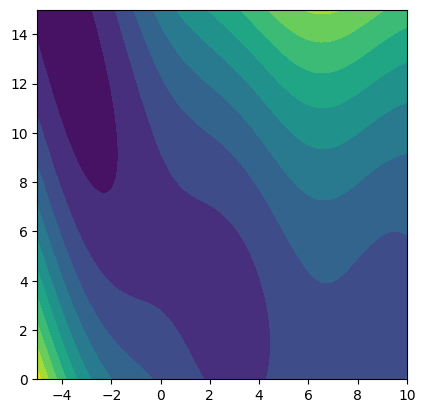

In [12]:

xx = np.linspace(-5 ,10, num=100)
yy = np.linspace(0,15, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
contourf(X, Y, fun(X, Y, a,b,c,s,r,t), levels=10)
gca().set_aspect('equal')

In [27]:
xk_algo1 = np.zeros(Nsteps+1)
yk_algo1 = np.zeros(Nsteps+1)

fK_algo1=np.zeros(Nsteps+1)
norma_grad_algo1=np.zeros(Nsteps+1)

xk_algo1[0] = x_0    
yk_algo1[0] = y_0   
fK_algo1[0]= fun(x_0,y_0,a,b,c,s,r,t)

for ii in range(Nsteps):

  calculo_gradiente=grad(xk_algo1[ii], yk_algo1[ii], a,b,c,s,r,t)
  xk_algo1[ii+1] = xk_algo1[ii] - alpha*calculo_gradiente[0]
  yk_algo1[ii+1] = yk_algo1[ii] - alpha*calculo_gradiente[1]

  ## calculamos la evolucion ee f y norma grad
  fK_algo1[ii+1]=fun(xk_algo1[ii],yk_algo1[ii],a,b,c,s,r,t)
  norma_grad_algo1[ii]= np.transpose(calculo_gradiente) @ calculo_gradiente





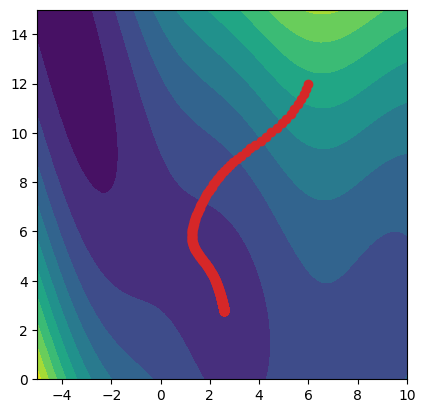

In [25]:
contourf(X, Y, fun(X, Y, a,b,c,s,r,t), levels=10)
plot(xk_algo1, yk_algo1, color='C3', marker='o')
gca().set_aspect('equal')




# Evolucion de F

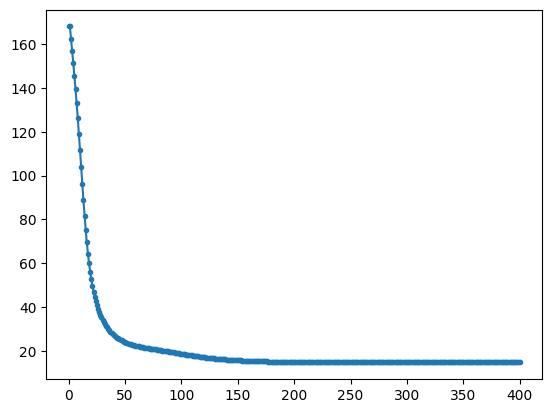

In [20]:
plot(fK_algo1, marker='.')


# Evolución de norma $\|\nabla f|$

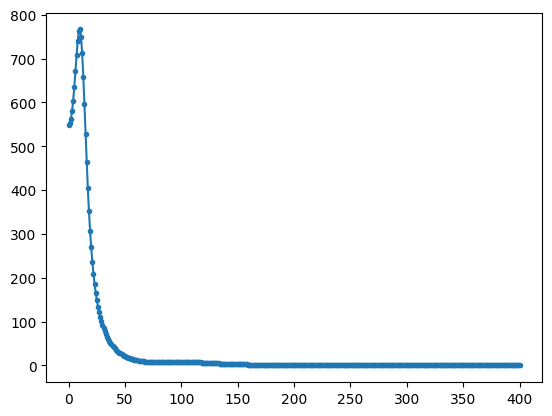

In [28]:
plot(norma_grad_algo1, marker='.')


# Pregunta 1
El método 1 comparado con el resto tiene como un lag para converger. El gradiente y la funcion es mas estable, pero convergen mas lento

# Evolución de norma $\|\nabla f|$

# Algoritmo 2

Modificamos el primero para agregarle un vector ponderado con el beta y luego restarlo.

In [47]:
datos=algoritmo_2(0.8)

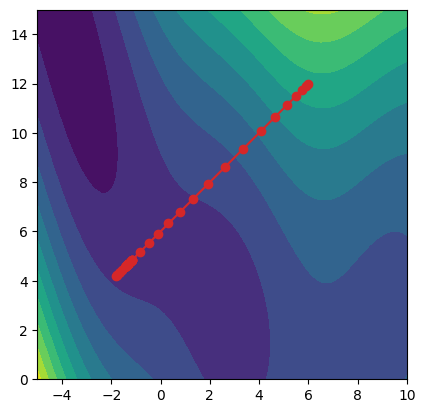

In [ ]:
contourf(X, Y, fun(X, Y, a,b,c,s,r,t), levels=10)
plot(datos[0], datos[1], color='C3', marker='o')
gca().set_aspect('equal')

# Evolucion de f()

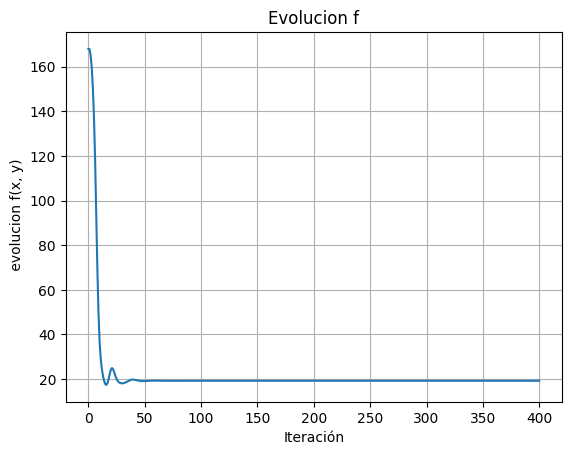

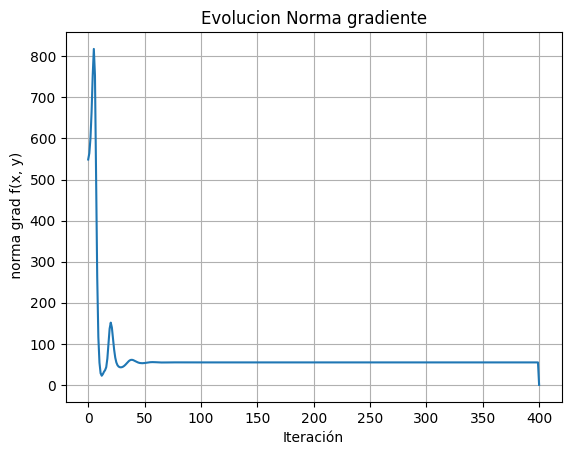

In [49]:
plotting(datos[2],datos[3])

# Algoritmo 2 con $\beta = 0.9$

In [52]:
datos_09=algoritmo_2(0.9)

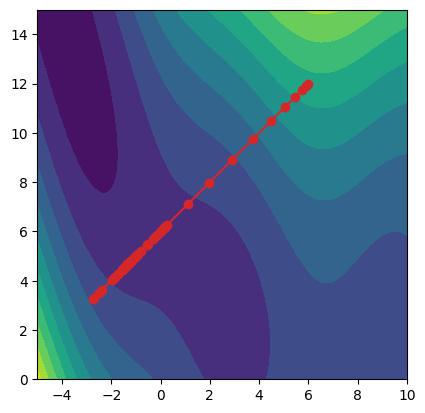

In [53]:
contourf(X, Y, fun(X, Y, a,b,c,s,r,t), levels=10)
plot(datos_09[0], datos_09[1], color='C3', marker='o')
gca().set_aspect('equal')

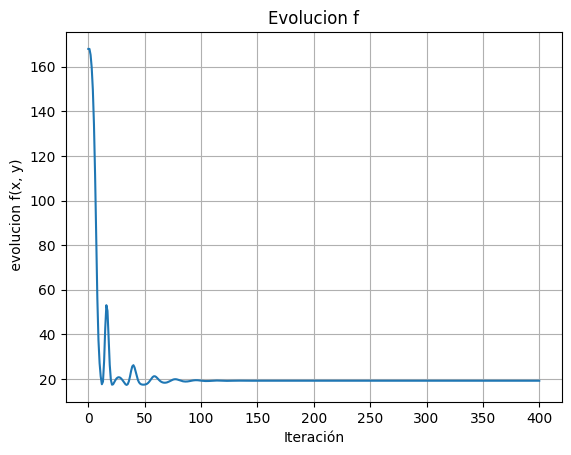

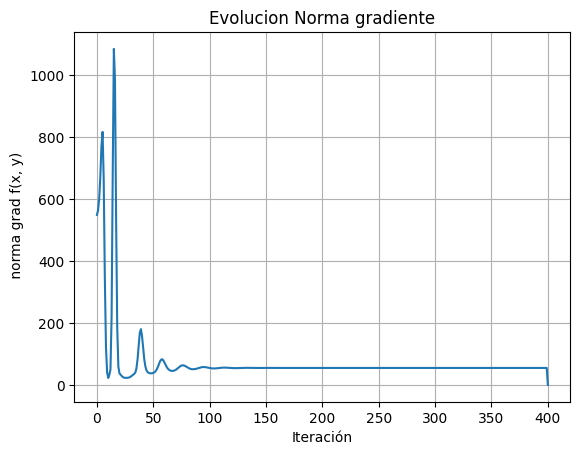

In [ ]:
plotting(datos_09[2],datos_09[3])

# Algoritmo 3 con  $\beta=0.8$

Respuesta pregunta 2. Este algoritmo parece converger mas rapido, no llegue a correr el ejemplo 4 y en teste caso llega apenas ante (parece)
que el algoritmo 1

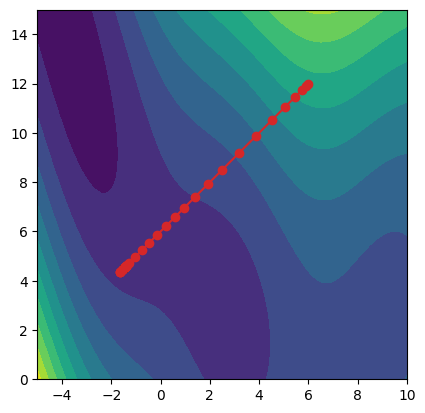

In [99]:
datos_algo3_0_8=algoritmo_3(0.8)
contourf(X, Y, fun(X, Y, a,b,c,s,r,t), levels=10)
plot(datos_algo3_0_8[0], datos_algo3_0_8[1], color='C3', marker='o')
gca().set_aspect('equal')

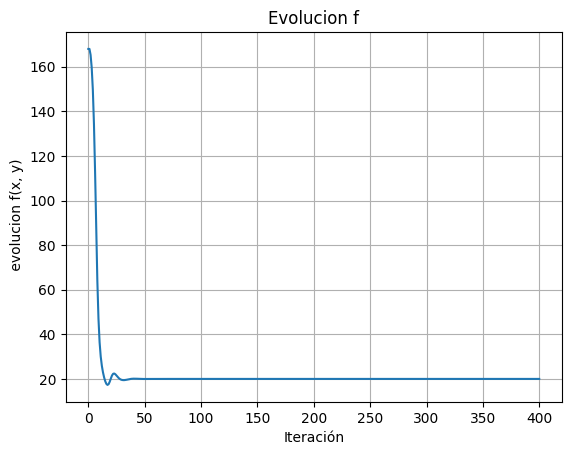

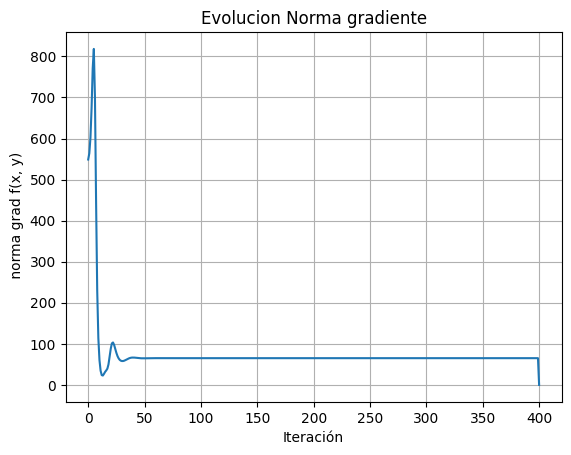

In [100]:
plotting(datos_algo3_0_8[2],datos_algo3_0_8[3])

# Algoritmo 3 con  $\beta=0.9$

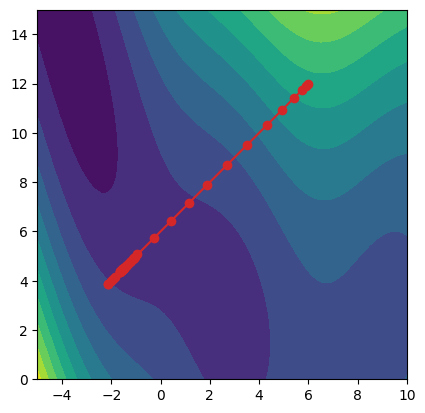

In [101]:
datos_algo3_0_9=algoritmo_3(0.9)
contourf(X, Y, fun(X, Y, a,b,c,s,r,t), levels=10)
plot(datos_algo3_0_9[0], datos_algo3_0_9[1], color='C3', marker='o')
gca().set_aspect('equal')

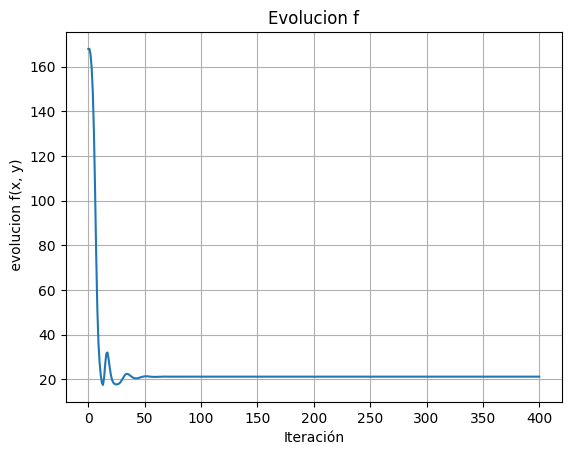

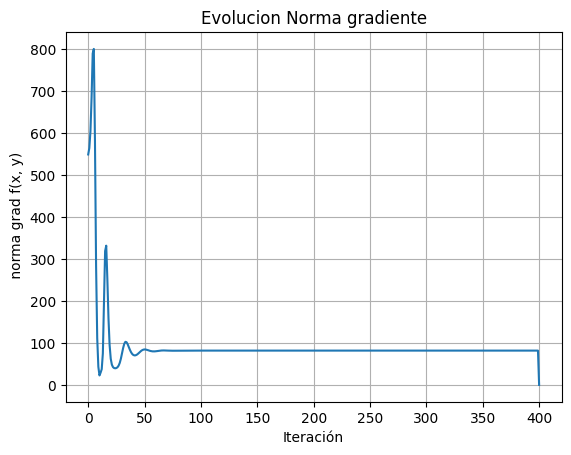

In [102]:
plotting(datos_algo3_0_9[2],datos_algo3_0_9[3])

# Algoritmo 4

In [114]:
beta=0.9
epsilon=1e-3
xk_algo4 = np.zeros(Nsteps+1)
yk_algo4 = np.zeros(Nsteps+1)

rk_x_algo4=np.zeros(Nsteps+1)
rk_y_algo4=np.zeros(Nsteps+1)

dk_x_algo4=np.zeros(Nsteps+1)
dk_y_algo4=np.zeros(Nsteps+1)

pk_x_algo4=np.zeros(Nsteps+1)
pk_y_algo4=np.zeros(Nsteps+1)

fK_algo4=np.zeros(Nsteps+1)
norma_grad_algo4=np.zeros(Nsteps+1)

xk_algo4[0] = x_0    
yk_algo4[0] = y_0 
rk_x_algo4[0]=0
rk_y_algo4[0]=0
dk_x_algo4[0]=0
dk_y_algo4[0]=0
pk_x_algo4[0]=0
pk_y_algo4[0]=0

fK_algo4[0]= fun(x_0,y_0,a,b,c,s,r,t)

for ii in range(Nsteps):
    calculo_gradiente=grad(xk_algo4[ii], yk_algo4[ii], a,b,c,s,r,t)
    rk_x_algo4[ii+1]=beta*rk_x_algo4[ii]+(1-beta)*(calculo_gradiente[0]**2)
    rk_y_algo4[ii+1]=beta*rk_y_algo4[ii]+(1-beta)*(calculo_gradiente[1]**2)

    sqr_val1=np.sqrt(dk_x_algo4[ii]+epsilon)
    sqr_val2=np.sqrt(rk_x_algo4[ii]+epsilon)
    
    pk_x_algo4[ii+1]=-(sqr_val1/sqr_val2)*calculo_gradiente[0]
    pk_y_algo4[ii+1]=-(np.sqrt(dk_y_algo4[ii]+epsilon)/np.sqrt(rk_y_algo4[ii]+epsilon))*calculo_gradiente[1]

    dk_x_algo4[ii+1]=beta*dk_x_algo4[ii]+(1-beta)*pk_x_algo4[ii+1]**2
    dk_y_algo4[ii+1]=beta*dk_y_algo4[ii]+(1-beta)*pk_y_algo4[ii+1]**2

    xk_algo4[ii+1] = xk_algo4[ii] +pk_x_algo4[ii+1]
    yk_algo4[ii+1] = yk_algo4[ii] +pk_y_algo4[ii+1]

        ## calculamos la evolucion ee f y norma grad
    fK_algo4[ii+1]=fun(xk_algo4[ii],yk_algo4[ii],a,b,c,s,r,t)
    norma_grad_algo4[ii]= np.transpose(calculo_gradiente) @ calculo_gradiente

/var/folders/jr/t_k402pj3bg57t7p56rgmknr0000gn/T/ipykernel_27795/2846722976.py:5: RuntimeWarning: overflow encountered in scalar multiply
  componente1=2*a*(y-b*x**2+c*x-r)*(-2*b*x+c)-s*(1-t)*np.sin(x)+5
/var/folders/jr/t_k402pj3bg57t7p56rgmknr0000gn/T/ipykernel_27795/3750894222.py:32: RuntimeWarning: overflow encountered in scalar power
  rk_y_algo4[ii+1]=beta*rk_y_algo4[ii]+(1-beta)*(calculo_gradiente[1]**2)
/var/folders/jr/t_k402pj3bg57t7p56rgmknr0000gn/T/ipykernel_27795/3750894222.py:41: RuntimeWarning: overflow encountered in scalar power
  dk_y_algo4[ii+1]=beta*dk_y_algo4[ii]+(1-beta)*pk_y_algo4[ii+1]**2
/var/folders/jr/t_k402pj3bg57t7p56rgmknr0000gn/T/ipykernel_27795/2846722976.py:2: RuntimeWarning: overflow encountered in scalar power
  return a*(y-b*x**2+c*x-r)**2+s*(1-t)*np.cos(x)+s+5*x
/var/folders/jr/t_k402pj3bg57t7p56rgmknr0000gn/T/ipykernel_27795/3750894222.py:48: RuntimeWarning: overflow encountered in matmul
  norma_grad_algo4[ii]= np.transpose(calculo_gradiente) @ calc

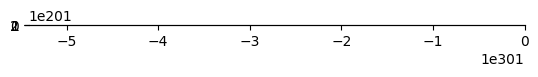

In [108]:
contourf(X, Y, fun(X, Y, a,b,c,s,r,t), levels=10)
plot(xk_algo4, yk_algo4, color='C3', marker='o')
gca().set_aspect('equal')

## Respuesta pregunta 3. 
Con 400 iteraciones no le veo mucho sentido, convergen bastante rápido y el algoritmo 1 parece haber sido una opcion simple y válida.

## Respuesta pregunta 3. 
El algoritmo 2 al pasar a 0.9 converge "mucho" mas lento y se hace algo inestable sobre el punto de convergencia. 
Con el algoritmo 3 pasa lo mismo pero se hace menos inestable y no converge tan lento